In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('listings.csv')
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
print(f"The average price is: ${df['price'].mean():.2f}")

The average price is: $121.00


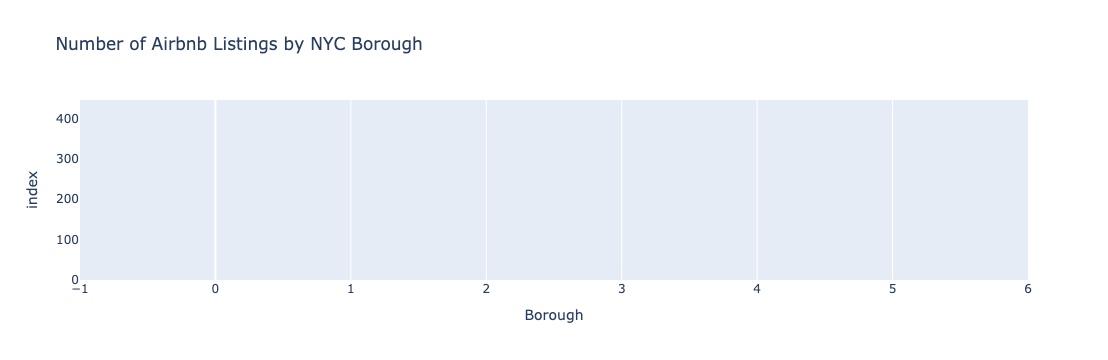

In [2]:
fig = px.bar(df,
             x='neighbourhood_group',
             title="Number of Airbnb Listings by Albany Neighbourhood",
             labels={'neighbourhood': 'Neighbourhood', 'count': 'Number of Listings'})
fig.show()

room_type
Entire home/apt    326
Private room       121
Name: count, dtype: int64


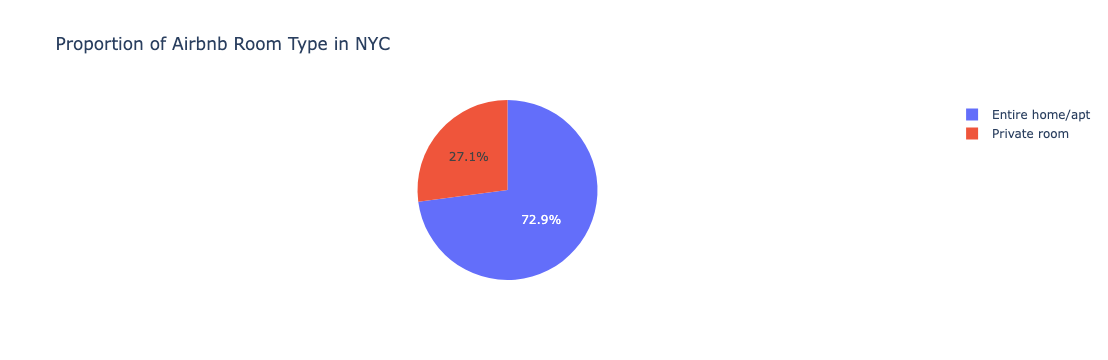

In [3]:
room_type_counts = df['room_type'].value_counts()
print(room_type_counts)

fig = px.pie(room_type_counts,
             names=room_type_counts.index,
             values=room_type_counts.values,
             title="Proportion of Airbnb Room Type in Albany")
fig.show()

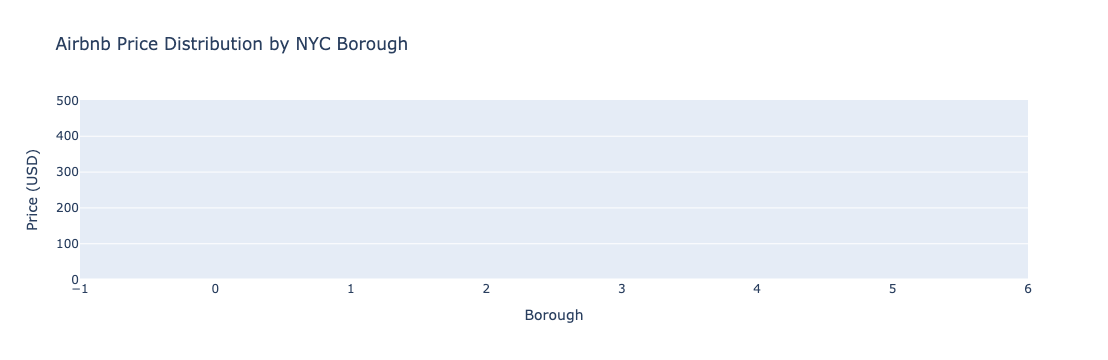

In [4]:
df_filtered = df[df['price'] < 500]

fig = px.box(df_filtered,
             x='neighbourhood',
             y='price',
             title="Airbnb Price Distribution by Albany Neighbourhood",
             labels={'neighbourhood': 'Neighbourhood', 'price': 'Price (USD)'})
fig.show()

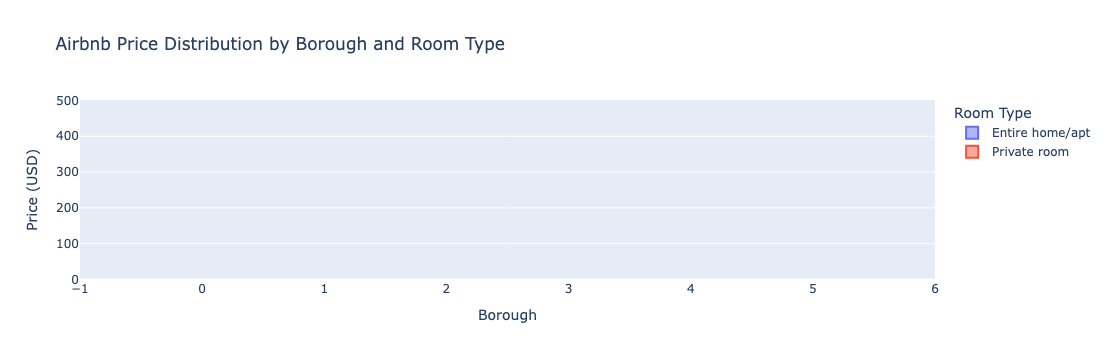

In [5]:
fig = px.box(df_filtered,
             x='neighbourhood',
             y='price',
             color='room_type',
             title="Airbnb Price Distribution by Neighbourhood and Room Type",
             labels={'neighbourhood': 'Neighbourhood', 'price': 'Price (USD)', 'room_type': 'Room Type'})
fig.show()

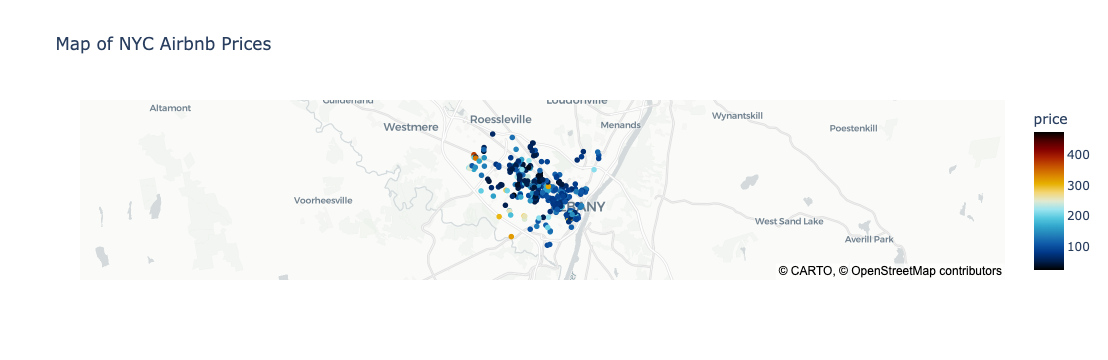

In [6]:
fig = px.scatter_map(df_filtered,
                        lat="latitude",
                        lon="longitude",
                        color="price",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        zoom=10,
                        map_style="carto-positron",
                        title="Map of Albany Airbnb Prices",
                        hover_name="name",
                        hover_data={"neighbourhood": True, "price": True, "room_type": True})
fig.show()

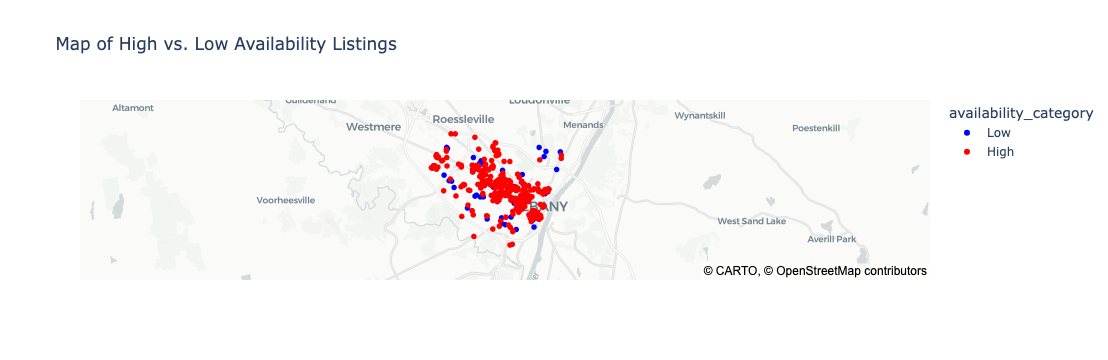

In [7]:
df['availability_category'] = df['availability_365'].apply(lambda x: 'High' if x > 90 else 'Low')

fig = px.scatter_map(df,
                        lat="latitude",
                        lon="longitude",
                        color="availability_category",
                        color_discrete_map={'High': 'red', 'Low': 'blue'},
                        zoom=10,
                        map_style="carto-positron",
                        title="Map of High vs. Low Availability Listings")
fig.show()

In [8]:
reviews_df = df[(df['number_of_reviews'] > 0) & (df['price'] < 500)]

fig = px.scatter(reviews_df,
                 x="number_of_reviews",
                 y="price",
                 title="Price vs. Number of Reviews",
                 labels={'number_of_reviews': 'Number of Reviews', 'price': 'Price (USD)'},
                 trendline="ols")
fig.show()

In [9]:
correlation = reviews_df['price'].corr(reviews_df['number_of_reviews'])

print(f"The correlation between price and number of reviews is: {correlation:.4f}")

The correlation between price and number of reviews is: -0.0724
